In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib

In [5]:
df = pd.read_csv('/content/Uncleaned_DS_jobs.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [6]:
df.describe(include='all')

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,672.000000,672,672,672,672.000000,672,672,672,672,672.000000,672,672,672,672,672
unique,NaN,172,30,489,NaN,432,207,229,9,NaN,13,58,23,14,108
top,NaN,Data Scientist,$75K-$131K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,"San Francisco, CA","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,337,32,12,NaN,12,69,33,135,NaN,397,71,188,213,501
mean,335.500000,NaN,NaN,NaN,3.518601,NaN,NaN,NaN,NaN,1635.529762,NaN,NaN,NaN,NaN,NaN
std,194.133974,NaN,NaN,NaN,1.410329,NaN,NaN,NaN,NaN,756.746640,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,167.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1917.750000,NaN,NaN,NaN,NaN,NaN
50%,335.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN,NaN
75%,503.250000,NaN,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df.isnull().sum())

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


In [8]:
#there is no null values but if was there null values we will remove it by this code
df_clean = df.dropna()

In [9]:
#we will drop this column no need for it
df.drop(columns=['index'], inplace=True)

In [10]:
# Clean salary column
df['min_salary'] = df['Salary Estimate'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if pd.notnull(x) else np.nan)
df['max_salary'] = df['Salary Estimate'].apply(lambda x: int(re.findall(r'\d+', x)[1]) if pd.notnull(x) else np.nan)

# Clean company name
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

# Replace -1 and unknowns with np.nan
df.replace('-1', np.nan, inplace=True)
df.replace('Unknown / Non-Applicable', np.nan, inplace=True)

In [11]:
# Feature Engineering
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2
df['seniority'] = df['Job Title'].apply(lambda x: 'senior' if 'sr' in x.lower() or 'senior' in x.lower() else 'junior')
df['state'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

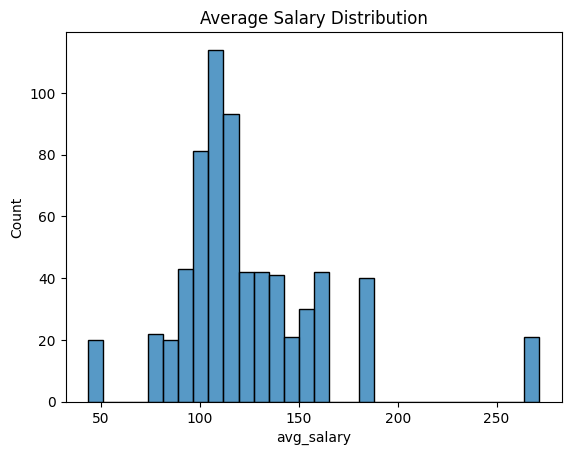

In [12]:
#EDA
sns.histplot(df['avg_salary'])
plt.title('Average Salary Distribution')
plt.show()

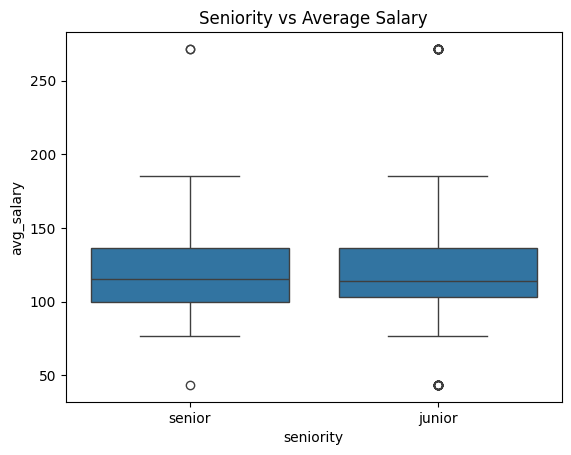

In [13]:
sns.boxplot(x='seniority', y='avg_salary', data=df)
plt.title('Seniority vs Average Salary')
plt.show()

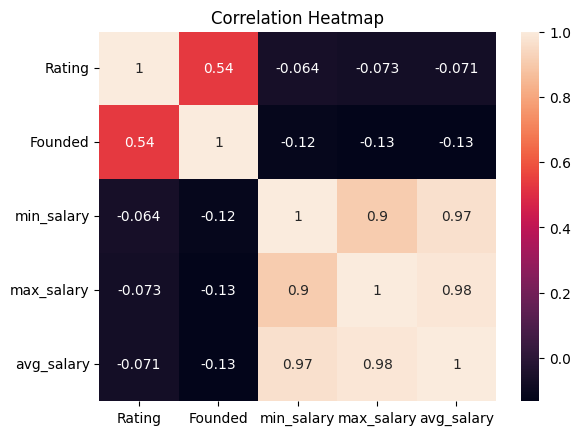

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

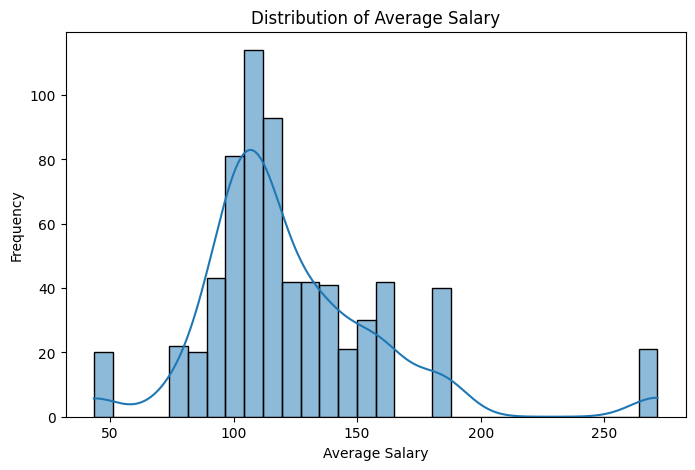

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['avg_salary'], kde=True, bins=30)
plt.title("Distribution of Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("Frequency")
plt.show()

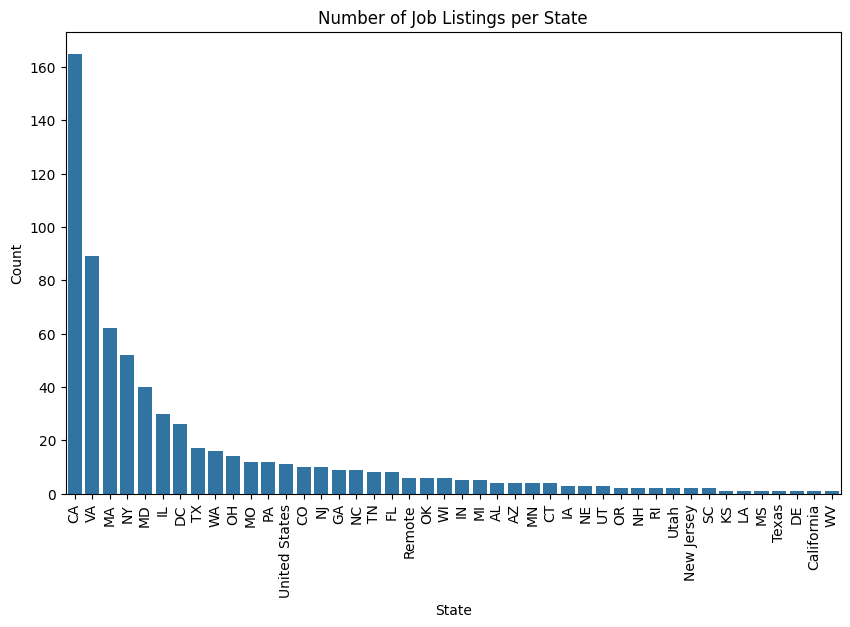

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title("Number of Job Listings per State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

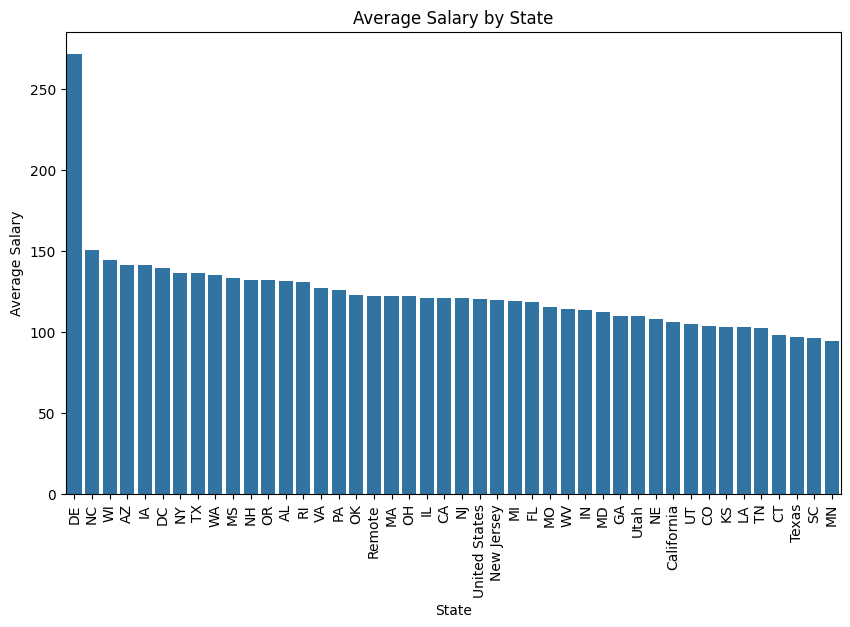

In [25]:
plt.figure(figsize=(10,6))
state_salary = df.groupby('state')['avg_salary'].mean().sort_values(ascending=False)
sns.barplot(x=state_salary.index, y=state_salary.values)
plt.title("Average Salary by State")
plt.xlabel("State")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Feature Selection
features = df[['Rating', 'Founded', 'seniority', 'state', 'avg_salary']]
features = pd.get_dummies(features, drop_first=True)

In [17]:
print(df.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'seniority', 'state'],
      dtype='object')


In [18]:
df['high_salary'] = (df['avg_salary'] > df['avg_salary'].median()).astype(int)

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Create the binary target variable 'high_salary' if not already present
df['high_salary'] = (df['avg_salary'] > df['avg_salary'].median()).astype(int)

# Step 2: Select features
features = df[['Rating', 'Founded', 'seniority', 'state', 'avg_salary']]
target = df['high_salary']

# Step 3: One-hot encode categorical features
features_encoded = pd.get_dummies(features, drop_first=True)

# Step 4: Apply SelectKBest with f_classif (filter method)
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(features_encoded, target)

# Step 5: (Optional) Retrieve the names of the selected features
selected_feature_names = features_encoded.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, target, test_size=0.2, random_state=42)



In [27]:
# Target variable
df['high_salary'] = (df['avg_salary'] > df['avg_salary'].median()).astype(int)
X = features
y = df['high_salary']

In [28]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
features = df[['Rating', 'Founded', 'seniority', 'state', 'avg_salary']]

In [36]:
non_numeric = features_encoded.dtypes[~features_encoded.dtypes.apply(lambda x: np.issubdtype(x, np.number))]
print("Non-numeric columns:\n", non_numeric)


Non-numeric columns:
 seniority_senior       bool
state_AZ               bool
state_CA               bool
state_CO               bool
state_CT               bool
state_California       bool
state_DC               bool
state_DE               bool
state_FL               bool
state_GA               bool
state_IA               bool
state_IL               bool
state_IN               bool
state_KS               bool
state_LA               bool
state_MA               bool
state_MD               bool
state_MI               bool
state_MN               bool
state_MO               bool
state_MS               bool
state_NC               bool
state_NE               bool
state_NH               bool
state_NJ               bool
state_NY               bool
state_New Jersey       bool
state_OH               bool
state_OK               bool
state_OR               bool
state_PA               bool
state_RI               bool
state_Remote           bool
state_SC               bool
state_TN               boo

In [37]:
# Step A: Replace bad characters and convert types
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')
df['avg_salary'] = pd.to_numeric(df['avg_salary'], errors='coerce')

# Step B: Drop missing rows now
features = df[['Rating', 'Founded', 'seniority', 'state', 'avg_salary']].dropna()
target = df['high_salary'].loc[features.index]

# Step C: One-hot encode all non-numeric columns
features_encoded = pd.get_dummies(features, drop_first=True)

# Step D: Check types
non_numeric = features_encoded.dtypes[~features_encoded.dtypes.apply(lambda x: np.issubdtype(x, np.number))]
print("After cleaning, non-numeric columns:\n", non_numeric)

# Step E: Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(features_encoded, target)
selected_feature_names = features_encoded.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Step F: Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, target, test_size=0.2, random_state=42)


After cleaning, non-numeric columns:
 seniority_senior       bool
state_AZ               bool
state_CA               bool
state_CO               bool
state_CT               bool
state_California       bool
state_DC               bool
state_DE               bool
state_FL               bool
state_GA               bool
state_IA               bool
state_IL               bool
state_IN               bool
state_KS               bool
state_LA               bool
state_MA               bool
state_MD               bool
state_MI               bool
state_MN               bool
state_MO               bool
state_MS               bool
state_NC               bool
state_NE               bool
state_NH               bool
state_NJ               bool
state_NY               bool
state_New Jersey       bool
state_OH               bool
state_OK               bool
state_OR               bool
state_PA               bool
state_RI               bool
state_Remote           bool
state_SC               bool
state_TN  

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
params = {'n_estimators': [50, 100, 150]}

# Use the correct model class
grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train, y_train)

# Print best parameters
print("Best Params:", grid.best_params_)


Best Params: {'n_estimators': 50}


In [40]:
#Final Evaluation
y_pred = grid.best_estimator_.predict(X_test)
print("Final Model Performance:\n", classification_report(y_test, y_pred))

Final Model Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        55

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [41]:
joblib.dump(grid.best_estimator_, 'model.pkl')
joblib.dump(X.columns.tolist(), 'features.pkl')

['features.pkl']